In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data
dataset = pd.read_csv('./data/data_for_ACI.csv')
dataset.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,12/30/2008 0:00,ACI,519.0,538.0,514.0,521.0,521.3,528.6,1205.0,119.4100,229250.0
1,12/28/2008 0:00,ACI,528.0,537.9,516.5,527.0,528.6,502.1,1214.0,91.9733,173700.0
2,12/24/2008 0:00,ACI,524.9,525.0,480.0,485.9,502.1,481.5,1570.0,166.5134,334500.0
3,12/23/2008 0:00,ACI,480.0,490.0,477.6,477.6,481.5,479.6,376.0,23.9691,49450.0
4,12/22/2008 0:00,ACI,477.2,489.0,477.1,481.0,479.6,482.9,525.0,36.4681,75650.0


In [3]:
dataset.tail()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
3526,2022-01-06 00:00:00,ACI,291.4,294.3,288.7,291.9,291.4,291.9,1147.0,71.766,246754.0
3527,2022-01-05 00:00:00,ACI,291.9,299.8,291.0,297.0,291.9,297.2,1303.0,54.608,185767.0
3528,2022-01-04 00:00:00,ACI,297.2,299.8,287.1,288.0,297.2,287.9,1426.0,71.985,244150.0
3529,2022-01-03 00:00:00,ACI,287.9,289.9,286.5,287.1,287.9,287.8,896.0,46.544,161731.0
3530,2022-01-02 00:00:00,ACI,287.8,289.9,284.0,285.4,287.8,285.4,567.0,20.504,71478.0


In [4]:
dataset.dropna(subset=['closing_price'],inplace=True)

In [5]:
dataset.isnull().sum()

date                         0
trading_code                 0
last_traded_price           17
high                        17
low                         17
opening_price                9
closing_price                0
yesterdays_closing_price     0
trade                       17
value_mn                    17
volume                      17
dtype: int64

In [6]:
data = dataset.reset_index()['closing_price']

In [7]:
data

0       521.3
1       528.6
2       502.1
3       481.5
4       479.6
        ...  
3525    291.4
3526    291.9
3527    297.2
3528    287.9
3529    287.8
Name: closing_price, Length: 3530, dtype: float64

In [8]:
data.shape

(3530,)

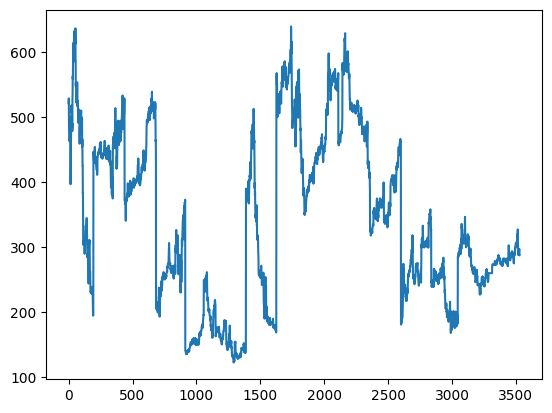

In [9]:
plt.plot(data)

In [10]:
# preprocessing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [12]:
data.shape

(3530, 1)

In [13]:
data

array([[0.77174966],
       [0.78589421],
       [0.73454757],
       ...,
       [0.33753149],
       [0.31951172],
       [0.31931796]])

In [14]:
# train & test data splitting

train_size = int(len(data)*0.8)
test_size = len(data) - train_size

train_size, test_size

(2824, 706)

In [15]:
train_data, test_data = data[0:train_size, :], data[train_size:len(data), :]

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [18]:
print(x_train)

[[0.77174966 0.78589421 0.73454757 ... 0.74287929 0.74966092 0.72175935]
 [0.78589421 0.73454757 0.69463282 ... 0.74966092 0.72175935 0.73047859]
 [0.73454757 0.69463282 0.69095137 ... 0.72175935 0.73047859 0.68242589]
 ...
 [0.29064135 0.29393528 0.28269715 ... 0.37202093 0.41755474 0.41232319]
 [0.29393528 0.28269715 0.284441   ... 0.41755474 0.41232319 0.41658593]
 [0.28269715 0.284441   0.28037202 ... 0.41232319 0.41658593 0.42162372]]


In [19]:
print(y_train)

[0.73047859 0.68242589 0.69560163 ... 0.41658593 0.42162372 0.43247433]


In [20]:
print(x_test)

[[0.43983724 0.44274365 0.44041852 ... 0.27765937 0.28560357 0.28579733]
 [0.44274365 0.44041852 0.4435187  ... 0.28560357 0.28579733 0.29141639]
 [0.44041852 0.4435187  0.44080605 ... 0.28579733 0.29141639 0.29393528]
 ...
 [0.30032939 0.30749855 0.30846735 ... 0.32241814 0.32067429 0.32629335]
 [0.30749855 0.30846735 0.30749855 ... 0.32067429 0.32629335 0.32726216]
 [0.30846735 0.30749855 0.30362333 ... 0.32629335 0.32726216 0.33753149]]


In [21]:
print(y_test)

[0.29141639 0.29393528 0.29083511 0.28560357 0.29432281 0.29742298
 0.302267   0.29703546 0.30788607 0.31195505 0.28366596 0.2799845
 0.275528   0.28289091 0.26913389 0.24723891 0.25750823 0.24413873
 0.23115675 0.22437512 0.20635536 0.2160434  0.1947297  0.16992831
 0.16915326 0.16740942 0.16159659 0.15965898 0.16469676 0.16489053
 0.16411548 0.16721566 0.17574114 0.16469676 0.15055222 0.15287735
 0.14415811 0.13485759 0.14532067 0.15733385 0.15074598 0.14454563
 0.13582639 0.13466382 0.13447006 0.13272622 0.13272622 0.13466382
 0.12187561 0.12206937 0.12168184 0.13078861 0.137764   0.12807595
 0.13388878 0.13059485 0.13834528 0.13369502 0.14202674 0.15403991
 0.16779694 0.18058516 0.14260802 0.13563263 0.15345863 0.13040109
 0.11373765 0.08796745 0.10153071 0.11276884 0.12962604 0.12865724
 0.11005619 0.09629917 0.11024995 0.11412517 0.11257508 0.1119938
 0.11625654 0.11509397 0.12361945 0.12807595 0.13098237 0.12768843
 0.13853904 0.13815152 0.14163922 0.15229607 0.15307111 0.146483

In [22]:
print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(2723, 100)
(2723,)
(605, 100)
(605,)


(None, None)

In [23]:
# reshape input into 3D array
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [24]:
x_train.shape, x_test.shape

((2723, 100, 1), (605, 100, 1))

In [25]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

# model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 80)        │        41,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,921 (581.72 KB)

 Trainable params: 148,921 (581.72 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.optimizers import Adam

In [29]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error',metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [31]:
model_summary = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, callbacks=early_stopping)

Epoch 1/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - accuracy: 0.0011 - loss: 0.0878 - val_accuracy: 0.0000e+00 - val_loss: 0.0010
Epoch 2/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 5.4139e-04 - loss: 0.0130 - val_accuracy: 0.0000e+00 - val_loss: 0.0013
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.0012 - loss: 0.0113 - val_accuracy: 0.0000e+00 - val_loss: 0.0011
Epoch 4/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 5.9210e-04 - loss: 0.0121 - val_accuracy: 0.0000e+00 - val_loss: 0.0018
Epoch 5/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.0011 - loss: 0.0098 - val_accuracy: 0.0000e+00 - val_loss: 6.7206e-04
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 7.9047e-04 - loss: 0.0099 - val_accuracy: 0.0000e+00 - val_loss: 6.8571e-04
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 2.4951e-04 - loss: 0.0082 - val_accuracy: 0.0000e+00 - val_loss: 0.0012
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms

In [32]:
test_predict = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [33]:
test_predict = scaler.inverse_transform(test_predict)

In [34]:
import math
from sklearn.metrics import mean_squared_error

In [35]:
math.sqrt(mean_squared_error(y_test,test_predict))

266.5188578591251

In [36]:
# export model

model.save("model_ACI.h5") 

In [37]:
from tensorflow.keras.models import load_model

In [39]:
test_model = load_model('./model_ACI.h5')

In [40]:
pred = test_model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


In [41]:
pred = scaler.inverse_transform(pred)

In [42]:
print(pred)

[[264.71594]
 [269.6264 ]
 [274.02286]
 [277.0064 ]
 [278.0572 ]
 [278.10074]
 [277.85046]
 [277.92197]
 [277.94827]
 [278.60623]
 [280.05652]
 [279.84833]
 [277.73642]
 [274.23422]
 [270.81528]
 [267.3593 ]
 [262.9376 ]
 [258.8012 ]
 [254.90382]
 [250.87177]
 [246.76392]
 [242.1212 ]
 [238.00124]
 [233.8728 ]
 [228.9602 ]
 [223.86086]
 [219.21552]
 [215.05754]
 [211.4817 ]
 [208.80191]
 [207.02719]
 [205.99687]
 [205.59377]
 [205.95668]
 [206.46654]
 [206.29715]
 [205.55287]
 [204.22833]
 [202.35771]
 [200.47585]
 [199.14359]
 [198.31703]
 [197.73885]
 [197.08107]
 [196.29324]
 [195.43822]
 [194.5651 ]
 [193.74353]
 [193.0562 ]
 [192.29712]
 [191.44832]
 [190.56328]
 [189.89116]
 [189.63109]
 [189.54799]
 [189.63275]
 [189.76343]
 [190.03221]
 [190.32184]
 [190.74974]
 [191.56393]
 [193.13466]
 [195.92055]
 [197.93756]
 [198.599  ]
 [198.60164]
 [197.81554]
 [196.23091]
 [193.8327 ]
 [191.10837]
 [188.62048]
 [186.85774]
 [185.91125]
 [185.3111 ]
 [184.59708]
 [183.94046]
 [183.474  ]

In [43]:
model_summary.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

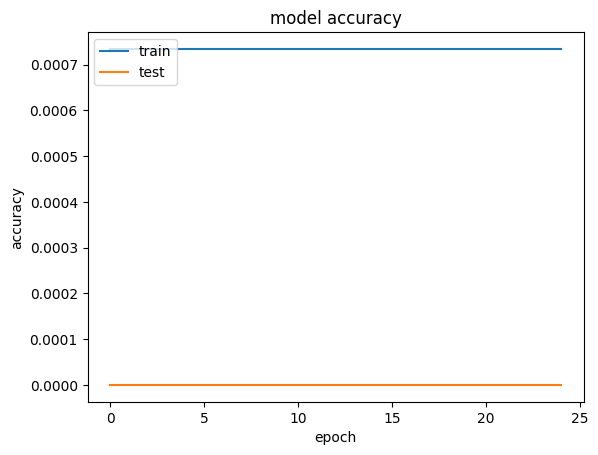

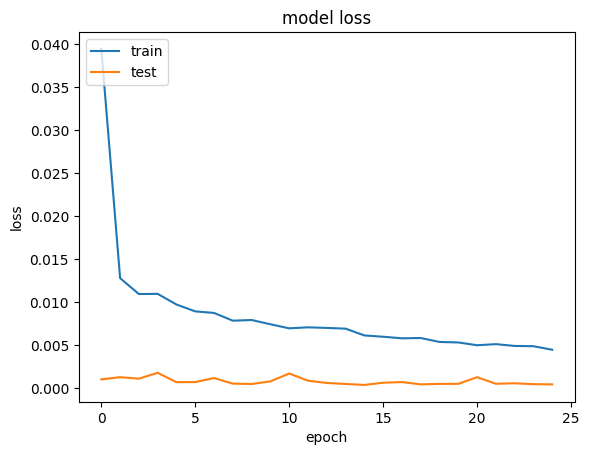

In [44]:
plt.plot(model_summary.history['accuracy'])
plt.plot(model_summary.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_summary.history['loss'])
plt.plot(model_summary.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


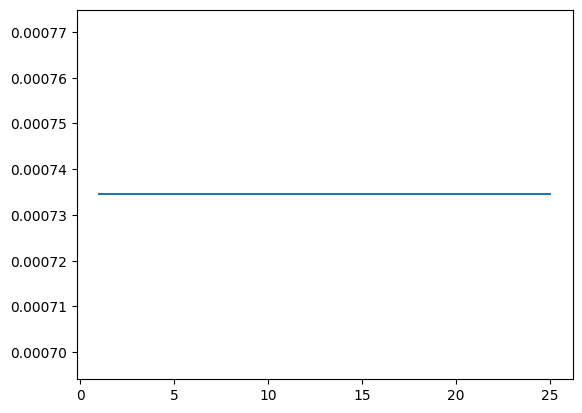

In [45]:
accuracy = model_summary.history['accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy)
plt.show()